Idee:
Es wird nach einem Quadrat gesucht mit definierter Grösse. Im Bild wird der Ausschnitt gesucht, welcher zur passenden Grösse die grösste weisse Fläche hat.

Ausgangssituation:
Da die Platte auf der sich die Schienen befindet weiss ist, findet der Algorithmus oft einen Punkt auf der Platte und nicht das weisse Signal.

In [1]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread('images/test_run2/small/imageFromWeb_000.jpg')
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  #convert it to hsv
plt.imshow(image)



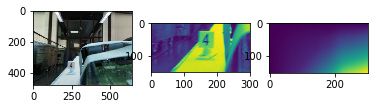

In [2]:
sub = image[300:450, 80:380]
sub_gray = cv2.cvtColor(sub, cv2.COLOR_RGB2GRAY)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)  # convert it to hsv
h, s, v = cv2.split(hsv)
v+=255
final_hsv = cv2.merge((h, s, v))

image = cv2.cvtColor(final_hsv, cv2.COLOR_HSV2BGR)
integral_image = cv2.integral(sub_gray)

plt.subplot(1,3,1)
plt.imshow(image)
plt.subplot(1,3,2)
plt.imshow(sub_gray)
plt.subplot(1,3,3)
plt.imshow(integral_image)

In [3]:
# sum = C + A - B - D\n",
# see https://en.wikipedia.org/wiki/Haar-like_feature\n",
def haar_feature(integral_image, height, width, row, col):
    c = integral_image[row+height, col+width]
    a = integral_image[row, col]
    b = integral_image[row, col+width]
    d = integral_image[row+height, col]
    return c + a - b - d

def find_rect(integral_image, height, width):
    max_value = 0
    max_position = (0,0)
    for row in range(integral_image.shape[0] - height - 5):
        for col in range(integral_image.shape[1] - width - 5):
            value = haar_feature(integral_image, height, width, row, col)
            if value > max_value:
                max_value = value
                max_position = (row, col)
    return max_position

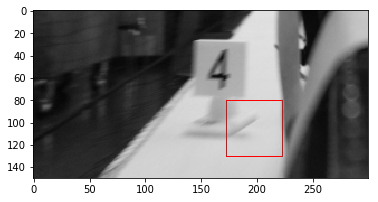

In [4]:
height = 50
width = 50
pos = find_rect(integral_image, height, width)

# display result\n",
displayed_image = cv2.cvtColor(sub_gray, cv2.COLOR_GRAY2RGB)
# OpenCV wants the position in x and y, which is different as row, col\n",
pos_xy = (pos[1], pos[0])
pos2_xy = (pos[1]+width, pos[0]+height)
cv2.rectangle(displayed_image, pos_xy, pos2_xy, (255, 0,0), 1)
plt.imshow(displayed_image)